In [ ]:
For more information about the Elasticsearch Query and Aggregation API, check out [the Elasticsearch API documentation](https://www.elastic.co/guide/en/elasticsearch/reference/current/search.html)

For more information about the `elasticsearch-dsl-py` library, check out the [elasticsearch-dsl-py documentation on ReadTheDocs](http://elasticsearch-dsl.readthedocs.org/en/latest/). 

[sharepa can be found on pypi](https://pypi.python.org/pypi/sharepa/). It is essentially a special case of `elasticsearch-dsl-py`'s Search object, so the documentation of the library should also apply to sharepa.

In [1]:
%matplotlib inline
from IPython.display import display

In [2]:
from sharepa import ShareSearch
from sharepa.analysis import bucket_to_dataframe

In [3]:
def tags(term=None, agg='significant_terms'):
    # Create a search object
    search = ShareSearch()
    
    # If there is a term provided, only search for documents that match that term
    if term:
        search = search.query('match', _all=term)
        
    # Set up the aggregation to aggregate based on the tags field
    search.aggs.bucket('top tags', agg, field='tags')
    print(search.to_dict())
    
    # This pulls the results from osf.io/api/v1/share/search/
    results = search.execute()
    
    # Convert the results into a pandas dataframe
    df = bucket_to_dataframe(
        'top tags', 
        results.aggregations['top tags']['buckets']
    ).sort('top tags', ascending=False)
    
    display(df)
    
    if agg == 'significant_terms':
        y = ['bg_count', 'top tags']
    else:
        y = 'top tags'
        
    df.plot(x='key', y=y, kind='bar')

{'query': {'match_all': {}}, 'aggs': {'top tags': {'terms': {'field': 'tags'}}}}


,key,top tags
0,ecological,20347
1,long,20179
2,term,20021
3,lter,18862
4,data,17086
5,research,16539
6,earth,16395
7,water,16150
8,program,16098
9,remote,15963


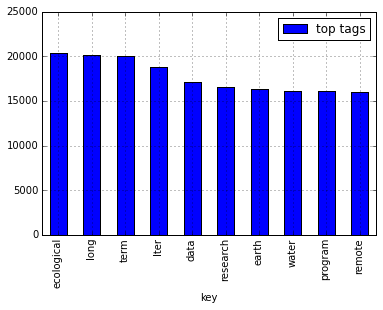

In [4]:
tags(agg='terms')

{'query': {'match_all': {}}, 'aggs': {'top tags': {'significant_terms': {'field': 'tags'}}}}


,bg_count,key,score,top tags
7,21968,ecological,0.000564,20347
6,21776,long,0.000564,20179
8,21604,term,0.000560,20021
9,20437,lter,0.000489,18862
0,16231,water,0.001042,16150
1,16012,california,0.001039,15951
3,15119,health,0.000959,15024
2,15021,county,0.000964,14946
5,14420,drinking,0.000952,14392
4,14396,contaminants,0.000954,14374


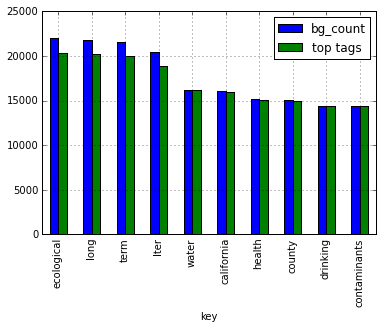

In [5]:
tags()

{'query': {'match': {'_all': 'cancer'}}, 'aggs': {'top tags': {'significant_terms': {'field': 'tags'}}}}


,bg_count,key,score,top tags
0,4215,cancer,2.216778,3327
2,2228,cell,0.378392,1010
1,1250,breast,0.555406,908
3,933,metastatic,0.342546,617
4,884,stage,0.328411,588
7,1005,lung,0.245347,544
9,765,carcinoma,0.237617,466
8,743,tumor,0.242777,464
6,612,recurrent,0.281251,452
5,558,prostate,0.283494,433


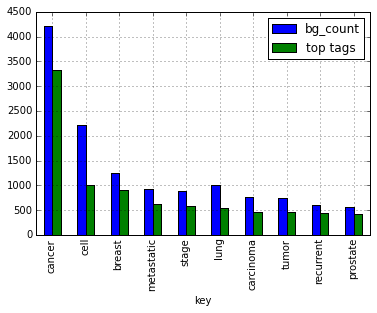

In [6]:
tags('cancer')

{'query': {'match': {'_all': 'flu'}}, 'aggs': {'top tags': {'significant_terms': {'field': 'tags'}}}}


,bg_count,key,score,top tags
1,190,influenza,52.609132,27
4,395,vaccine,11.217983,18
0,15,flu,131.762728,12
7,86,immunogenicity,5.732490,6
6,38,seasonal,9.019893,5
2,4,h1n1,30.881445,3
3,9,pandemic,13.721137,3
5,12,quadrivalent,10.289076,3
8,30,vaccines,4.111365,3
9,32,avian,3.853960,3


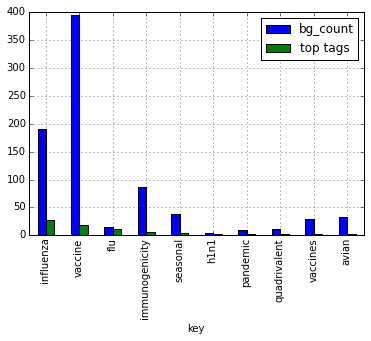

In [7]:
tags('flu')

{'query': {'match': {'_all': 'influenza'}}, 'aggs': {'top tags': {'significant_terms': {'field': 'tags'}}}}


,bg_count,key,score,top tags
0,190,influenza,34.537141,167
6,496,vaccine,1.635475,59
7,482,virus,1.626620,58
2,18,h7n9,2.208410,13
1,10,antigenic,2.353347,10
8,15,flu,1.567863,10
9,15,quadrivalent,1.567863,10
3,10,h1n1,1.905932,9
4,7,h5n1,1.647343,7
5,7,enzootic,1.647343,7


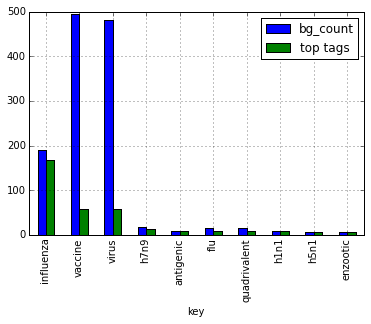

In [8]:
tags('influenza')

{'query': {'match': {'_all': 'vaccine'}}, 'aggs': {'top tags': {'significant_terms': {'field': 'tags'}}}}


,bg_count,key,score,top tags
0,496,vaccine,26.769193,394
2,190,influenza,3.019890,82
1,118,immunogenicity,4.636784,80
7,302,immunotherapy,1.151263,64
3,89,vaccination,2.399820,50
4,45,vaccines,2.328212,35
5,43,pneumococcal,1.672011,29
6,20,meningococcal,1.544535,19
8,26,pertussis,0.950149,17
9,16,quadrivalent,0.903479,13


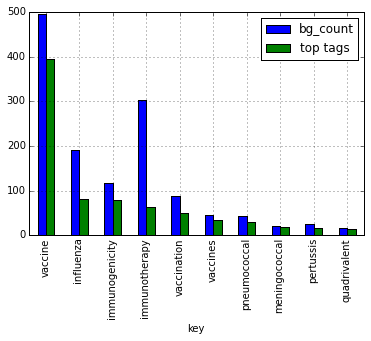

In [9]:
tags('vaccine')